# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Limitations and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this section of the report, the information colected from 100k medical appointemnt in Brazil is analyzed. The data focuses on whether or not the patients show up for their appointment. 
The Data consists of 14 columns which are as follow:
<p> 1- Patientt ID on the health system. </p>
<p> 2- Appointment ID or refrence number.</p>
<p> 3- The gender of the patient.</p>
<p> 4- The scheduled day.</p>
<p>5- The appointment Day.</p>
<p>6- The age of the patient.</p>
<p>7- The neighbourhood.</p>
<p>8- Scholarship.</p>
<p>9- Hypertension (0: NO, 1:Yes).</p>
<p>10- Diabets (0: NO, 1:Yes).</p>
<p>11- Alcoholism (0: NO, 1:Yes).</p>
<p>12- Handcap (0: NO, 1:Yes).</p>
<p>13- SMS received (0: NO, 1:Yes).</p>
<p>14- Show or no-show.</p>


### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessing the Data

*Assess the shape of the DataFrame*

In [4]:
df.shape

(110527, 14)

*Explore if any duplication exists*

In [5]:
df.duplicated().sum()

0

*Check if any data are missing*

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*Explore the DataFrame information and the tyoe of each column*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*Show the statsitcal summary for each column of the DataFrame*

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

*It was pointed out from the statstical desciption that the miimum age is -1, and hence this row should be removed*

In [9]:
df.drop(df[df['Age']==-1].index, inplace=True)
"""" Removing the row with the age equal to -1
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


*The Patient ID, the Appointment ID and the appointment Day should be droped from the dataframe sine they will not be used in this analysis*

In [10]:
df.drop(['PatientId', 'AppointmentID','AppointmentDay'], axis=1, inplace=True)

*Modify the name of the last column to be(No_show)*

In [11]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

*Show the statsitcal summary for each column after cleaning the DataFrame*

In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


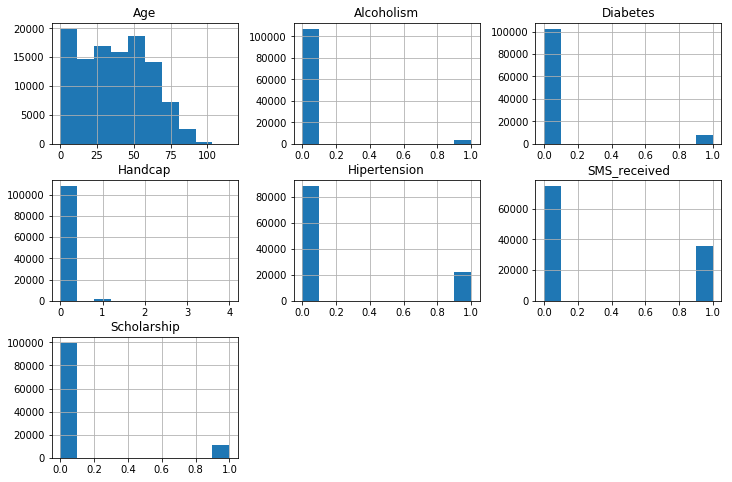

In [13]:
"""Histogram for each varaiable in the data"""
df.hist(figsize=(12,8));

*Replace the Strings in the "No_show" column by the values 0 and 1 to ease perfroming masks*

In [14]:
df.replace({'No_show':{'Yes':1 ,'No':0}}, inplace=True)

*Identify two important masks which will be used in filterung the data in order to assess the factors that affect the __NO-SHOW__*

In [15]:
noshow = df.No_show == True
show = df.No_show == False

<a id='eda'></a>
## Exploratory Data Analysis

### Is the Age associated with the patient attendence?

*Estimate the mean age that didn't show in the appointment*

In [16]:
df.Age[noshow].mean()

34.31766656212196

*Estimate the mean age with show appointments in its scheduled appointments*

In [17]:
df.Age[show].mean()

37.790504154999034

*Plot a histogram for the age to study its effect on the show and no-show appointments*

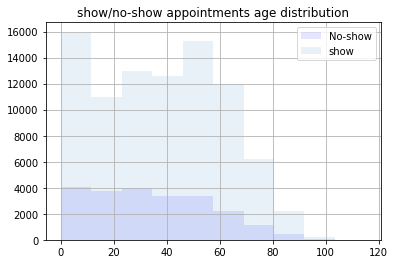

In [18]:
df.Age[noshow].hist(alpha=0.1, label='No-show', color='blue')
df.Age[show].hist(alpha=0.1, label='show')
plt.legend()
plt.title('show/no-show appointments age distribution');

*From the above figure, it is observed that the larger number of appointemnts are made for the age between 0 to 10. On the other hand, the numbe of patients above 80 years are very small compared to the other ranges*

*Ratio between male and female in this data*

In [19]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

*From the above cell, it can be seen that the number of femals is 46% higher than the number of males with scheduled appointments*

In [20]:
"""Estimate the mean of the No_show appointments based on the Gender"""
df.groupby('Gender').No_show.mean()

Gender
F    0.203149
M    0.199679
Name: No_show, dtype: float64

*However, 20% of the male and female did not show on their appointments, which means that the gender is not a factor that one could rely on to predict the no-show*

In [21]:
"""Calssify the data according to the gender with or without hypertension"""

df.groupby('Gender')['Hipertension'].value_counts()

Gender  Hipertension
F       0               56500
        1               15339
M       0               32225
        1                6462
Name: Hipertension, dtype: int64

In [22]:
"""Calssify the data according to the gender with or without diabetes"""

df.groupby('Gender')['Diabetes'].value_counts()

Gender  Diabetes
F       0           66233
        1            5606
M       0           36350
        1            2337
Name: Diabetes, dtype: int64

### Which disease could affect the 'no-show' situation?

*Introduce additional masks to study the effect on the disease type on the "no-show"*

In [23]:
Hipertension = df.Hipertension == True
Diabets = df.Diabetes == True
Alcoholism = df.Alcoholism == True

In [24]:
def bar_plot(x, y, xlabel, ylabel, width, labelname):
    ''' A function to draw a bar plot '''
    plt.bar(x,y, width, label=labelname)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best');
    return

In [25]:
""""Create an array for the show and no-show appointments scheduled by patients with different diseases"""

y_show    = [Hipertension[show].sum(), Diabets[show].sum(), Alcoholism[show].sum()]
y_noshow  = [Hipertension[noshow].sum(), Diabets[noshow].sum(), Alcoholism[noshow].sum()]

Text(0.5,1,'Show/No_show appointments for different diseases')

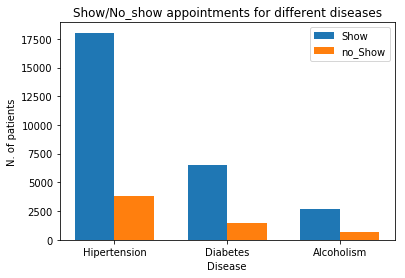

In [26]:
width = 0.35
bar_plot(np.arange(len(y_show)), y_show, "Disease", "N. of patients",width,'Show')
bar_plot(np.arange(len(y_noshow))+ width, y_noshow, "Disease", "N. of patients", width, 'no_Show')
plt.xticks(np.arange(len(y_show)) + width / 2, ('Hipertension', 'Diabetes', 'Alcoholism'))
plt.title('Show/No_show appointments for different diseases')

### Does the Handcap level affect the 'no-show' situation?

In [27]:
for i in range(max(df['Handcap'])+1):
    """" Find the number of HandCap with differemt levels """
    
    print('The data consists of', df[df['Handcap']==i].shape[0], 'level', i, 'Handcap' )

The data consists of 108285 level 0 Handcap
The data consists of 2042 level 1 Handcap
The data consists of 183 level 2 Handcap
The data consists of 13 level 3 Handcap
The data consists of 3 level 4 Handcap


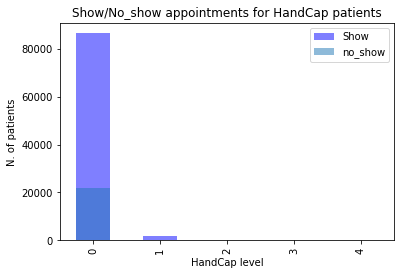

In [28]:
df.Handcap[show].value_counts().plot(alpha=0.5, kind='bar',label='Show', color='blue')
df.Handcap[noshow].value_counts().plot(alpha=0.5, kind='bar',label='no_show')
plt.xlabel("HandCap level")
plt.ylabel("N. of patients")
plt.legend();
plt.title('Show/No_show appointments for HandCap patients');

## Does Receiving SMS affect the no-show?

'The x-axis description is as follow:\n    (0,0): (SMS not received, show)\n    (0,1): (SMS not received, no_show)\n    (1,0): (SMS received, show)\n    (1,1): (SMS receieved, No_show)    \n'

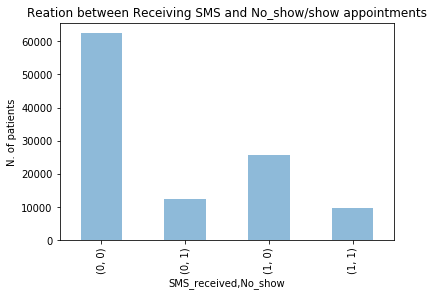

In [29]:
df.groupby('SMS_received')['No_show'].value_counts().plot(kind='bar',alpha=0.5)
plt.ylabel("N. of patients")
plt.title('Reation between Receiving SMS and No_show/show appointments')
"""The x-axis description is as follow:
    (0,0): (SMS not received, show)
    (0,1): (SMS not received, no_show)
    (1,0): (SMS received, show)
    (1,1): (SMS receieved, No_show)    
"""

Around 10,000 patients did not receive the SMS and they didn't show up in their appointment. Hence, sending SMS to all tyhe patient could reduce the number of the no-show cases

<a id='conclusions'></a>

### Limitations

<p>1- The distance between the health service and the neibegrhood could be very useful. As the no-show cases could be due to the lack of transportation service for example.</p>
<p>2- The data available for the higher HandCap level are very small compared to level 0 and 1 whcih make the judment difficult.</p>

### Conclusions

After analysing the data for 100k patients from several neighborhoods Brazil, the following conclusions are drawn:
<p>1- From the above figure, it is observed that the larger number of appointemnts are made for the age between 0 to 10. On the other hand, the numbe of patients above 80 years are very small compared to the other ranges.</p>
<p>2-20% of the male and female did not show on their appointments, which means that the gender is not a factor that one could rely on to predict the no-show.</p>
<p>3- The most scheduled appointemnts are for the patients with Hipertension.</p>
<p>4- Around 2200 Handcap patients have scheduled appointments, most of the them are with level 1.</p>
<p>5- Around 10,000 patients did not receive the SMS and they didn't show up in their appointment. Hence, sending SMS to all tyhe patient could reduce the number of the no-show cases.</p>


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0